<a href="https://colab.research.google.com/github/A-Akhlaghi246/PYTHON/blob/main/%D8%AA%D8%AD%D9%84%DB%8C%D9%84_%D8%A7%D8%AD%D8%B3%D8%A7%D8%B3%D8%A7%D8%AA_%D8%AC%D8%A7%D9%85%D8%B9%D9%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re

# دانلود داده‌های مورد نیاز NLTK
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('stopwords')

In [ ]:
class SentimentAnalyzer:
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()
        self.stop_words = set(stopwords.words('english') + list(string.punctuation))
        self.lemmatizer = nltk.WordNetLemmatizer()

    def preprocess_text(self, text):
        # حذف لینک‌ها
        text = re.sub(r'http\S+', '', text)
        # حذف کاراکترهای خاص
        text = re.sub(r'[^\w\s]', '', text)
        # توکن‌سازی
        tokens = word_tokenize(text.lower())
        # حذف کلمات بی‌معنی و لماتیزاسیون
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens
                 if word not in self.stop_words and word.isalpha()]
        return ' '.join(tokens)

    def analyze_sentiment(self, text):
        processed_text = self.preprocess_text(text)
        scores = self.analyzer.polarity_scores(processed_text)
        return scores

    def analyze_dataset(self, texts):
        results = []
        for text in texts:
            if pd.isna(text) or text.strip() == '':
                continue
            sentiment = self.analyze_sentiment(text)
            results.append({
                'text': text,
                'positive': sentiment['pos'],
                'negative': sentiment['neg'],
                'neutral': sentiment['neu'],
                'compound': sentiment['compound']
            })
        return pd.DataFrame(results)

In [ ]:
class SentimentVisualizer:
    @staticmethod
    def plot_sentiment_distribution(df):
        sentiment_counts = pd.cut(df['compound'],
                                bins=[-1, -0.5, 0.5, 1],
                                labels=['Negative', 'Neutral', 'Positive']).value_counts()

        plt.figure(figsize=(8, 6))
        sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
        plt.title('Distribution of emotions')
        plt.xlabel('Emotions')
        plt.ylabel('Quantity')
        plt.show()

    @staticmethod
    def plot_word_cloud(texts, sentiment='positive'):
        wordcloud = WordCloud(width=800, height=400,
                            background_color='white').generate(texts)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Feeling word cloud {sentiment}')
        plt.axis('off')
        plt.show()

    @staticmethod
    def plot_time_series(df, date_col='date'):
        if date_col not in df.columns:
            print("The date column does not exist.")
            return

        time_series = df.groupby(pd.to_datetime(df[date_col]).dt.date)['compound'].mean()
        plt.figure(figsize=(12, 6))
        time_series.plot()
        plt.title('The process of changing emotions over time')
        plt.xlabel('Date')
        plt.ylabel('Average sentiment score')
        plt.grid()
        plt.show()

                                                text  positive  negative  \
0  I am older at twenty than a lot of people who ...      0.00     0.474   
1  I have made a lot of mistakes but you will nev...      0.00     0.375   
2  I am crazy sad, and somewhere deep inside, all...      0.12     0.509   
3  I don’t even remember why I’m wasting all thes...      0.00     0.351   
4                   The heart was made to be broken.      0.00     0.608   

   neutral  compound  
0    0.526   -0.5574  
1    0.625   -0.3400  
2    0.370   -0.6369  
3    0.649   -0.4019  
4    0.392   -0.4767  


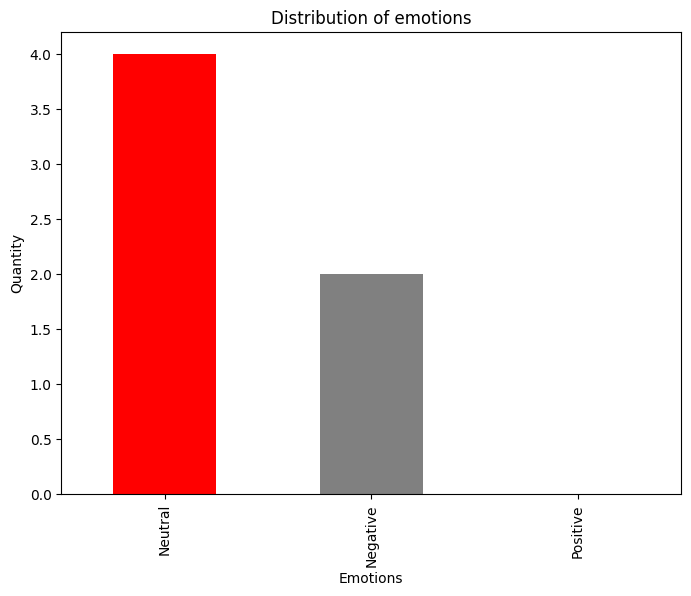

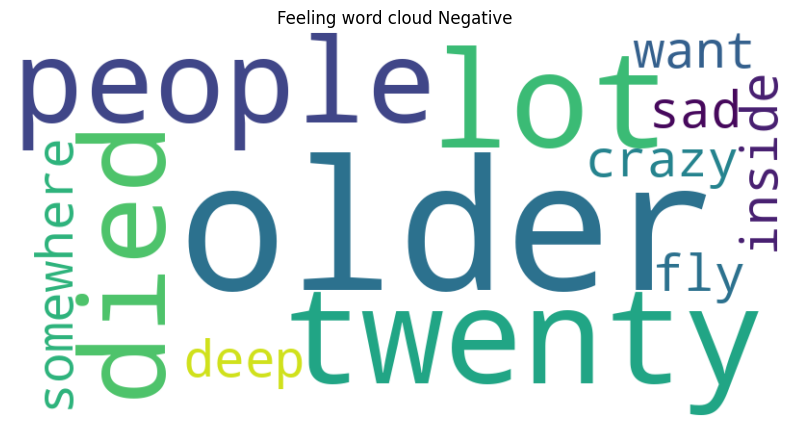

In [ ]:
def main():
    # نمونه داده‌ها
    sample_texts = [
        "I am older at twenty than a lot of people who have died. ",
        "I have made a lot of mistakes but you will never be one of them.",
        "I am crazy sad, and somewhere deep inside, all I want is to fly.",
        "I don’t even remember why I’m wasting all these tears on you.",
        "The heart was made to be broken.",
        "Silence was righteous, the voice broke in throat."

    ]

    # تحلیل احساسات
    analyzer = SentimentAnalyzer()
    results = analyzer.analyze_dataset(sample_texts)

    # نمایش نتایج
    print(results.head())

    # تجسم نتایج
    visualizer = SentimentVisualizer()
    visualizer.plot_sentiment_distribution(results)

    # ابر کلمات مثبت
    positive_texts = ' '.join(results[results['compound'] > 0.5]['text'])
    if positive_texts:
        visualizer.plot_word_cloud(positive_texts, 'Positive')

    # ابر کلمات منفی
    negative_texts = ' '.join(results[results['compound'] < -0.5]['text'])
    if negative_texts:
        visualizer.plot_word_cloud(negative_texts, 'Negative')

if __name__ == "__main__":
    main()